# Flas

In [36]:
from mevlib.utils.utils import connect_to_mongodb
import pandas as pd
from pymongo import ASCENDING, DESCENDING
import matplotlib.pyplot as plt

Connect to MongoDB and get a connection object for our collection.

In [9]:
db = connect_to_mongodb()
confirmed_mevs = db.flashbots.confirmed_mevs

# Analysis

When is our first block from?

In [30]:
first_block = confirmed_mevs.find().sort("block_number", ASCENDING).limit(1)[0]["block_number"]
print(f"First collected block: {first_block}")

First collected block: 10000071


When was the last block from?

In [33]:
last_block = confirmed_mevs.find().sort("block_number", DESCENDING).limit(1)[0]["block_number"]
print(f"Last collected block: {last_block}")

Last collected block: 13699975


## When is the first Flashbots block from?

Christof's measurements go back to before Flashbots was operational. This calculation shows the first time the Flashbots API 

In [32]:
first_flashbots_block = confirmed_mevs.find({"flashbots_bundle": True}).sort("block_number", ASCENDING).limit(1)[0]["block_number"]
print(f"First Flashbots block: {first_flashbots_block}")

First Flashbots block: 11986936


## What proportion of Ethereum transactions went through Flashbots?

How many transactions went through Flashbots during this time span?

In [28]:
flashbots_txs = confirmed_mevs.count_documents({"flashbots_bundle": True})
print(f"Flashbots transactions: {flashbots_txs}")

Flashbots transactions: 410381


How many transactions did not go through Flashbots during this time span?

In [29]:
non_flashbots_txs = confirmed_mevs.count_documents({"flashbots_bundle": False})
print(f"Non-Flashbots transactions: {non_flashbots_txs}")

Non-Flashbots transactions: 516402


### Flashbots transactions over full time interval

We start by plotting the ratio of Flashbots transactions to non-Flashbots transactions over the entire time interval.

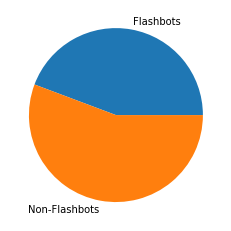

In [38]:
plt.pie([flashbots_txs, non_flashbots_txs], labels = ["Flashbots", "Non-Flashbots"])
plt.show() 

We can see that a little less than half of the transactions used flashbots over the *entire* time span. However, we must ask what these ratios look like independently before and after Flashbots started. Really, we can only go back to when the Flashbots API provides history from, we do not know whether or not that truly coincides with the start of Flashbots.

### Flashbots transactions before Flashbots started (sanity check, should be zero)

In [40]:
flashbots_txs_before = confirmed_mevs.count_documents({"flashbots_bundle": True, "block_number": {"$lt": first_flashbots_block}})
non_flashbots_txs_before = confirmed_mevs.count_documents({"flashbots_bundle": False, "block_number": {"$lt": first_flashbots_block}})

print(f"Flashbots transactions: {flashbots_txs_before}")
print(f"Non-Flashbots transactions: {non_flashbots_txs_before}")

Flashbots transactions: 0
Non-Flashbots transactions: 356490


We see the expected zero Flashbots transactions, which grants us a little more confidence in the data.

### Flashbots transactions *after* Flashbots started (sanity check, should be zero)

In [41]:
flashbots_txs_after = confirmed_mevs.count_documents({"flashbots_bundle": True, "block_number": {"$gte": first_flashbots_block}})
non_flashbots_txs_after = confirmed_mevs.count_documents({"flashbots_bundle": False, "block_number": {"$gte": first_flashbots_block}})

print(f"Flashbots transactions: {flashbots_txs_after}")
print(f"Non-Flashbots transactions: {non_flashbots_txs_after}")

Flashbots transactions: 410380
Non-Flashbots transactions: 159911


We can now plot the ratio of Flashbots transactions to non-Flashbots transactions over *only* the time interval that Flashbots was operational.

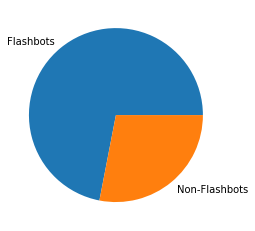

In [42]:
plt.pie([flashbots_txs_after, non_flashbots_txs_after], labels = ["Flashbots", "Non-Flashbots"])
plt.show() 